In [1]:
from matplotlib import pyplot as plt
mazeT = plt.imread('maze.png')
maze_TC = mazeT.copy()

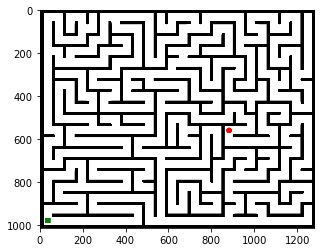

In [2]:
plt.imshow(mazeT)
plt.show()

In [3]:
#remove all starting and end point pixels
start = []
start_found = False
end = []
end_found = False
all_end = []
all_start = []

for i,row in enumerate(mazeT):
    for j,pixel in enumerate(row):
        
        if pixel[1] > pixel[2] and pixel[1] > pixel[0]:
            start_found = True
            start  = (i,j)
            all_start.append(start)
        elif pixel[1] < pixel[0] and pixel[2] < pixel[0]:
            end_found = True
            end = (i,j)
            all_end.append(end)

      
        
         

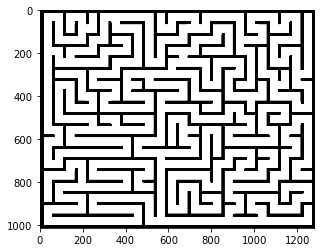

In [4]:
for e,s in zip(all_start,all_end):
    sx,sy = s
    ex,ey = e
    mazeT[sx][sy] = [0,0,0,0]
    mazeT[ex][ey] = [0,0,0,0]
    
plt.imshow(mazeT)
plt.show()


In [5]:
mazeT[sx][sy]
mazeT[ex][ey]        


array([ 0.,  0.,  0.,  0.], dtype=float32)

In [6]:
def is_white(point):
    x,y = point
    pixel = mazeT[x][y]
    isTransparent = pixel[-1] == 0
    if isTransparent:
        return True
    else:
        return False


In [7]:
def updateQ(v,q,visited):
    x,y = v
    nbrs = []
    p1 = (x + 1 ,y)
    p2 = (x -1 , y)
    p3 = (x, y+1)
    p4 = (x, y-1)
    points = [p1,p2,p3,p4]
    for child in points:
        if is_white(child) and child not in visited:
            q.append(child)
            nbrs.append(child)
    return q,nbrs



In [8]:

def BFS(start,end):
    q = [start]
    visited = set()
    dic = {}
    while (len(q) > 0):
        v = q.pop(0)
        if (end == v):
            return dic
        if (v not in visited):
            visited.add(v)
            q,nbrs = updateQ(v,q,visited)
            for n in nbrs:
                dic[n] = v
    return "fail"
    
path = BFS(start,end)


In [9]:
print len(path)


393494


In [10]:
maze_copy = mazeT.copy()

In [11]:
xend = path[end]
while xend != start:
    size = 9
    x,y = xend
    for i in range(-size,size):
        for j in range(-size,size):
            maze_copy[x+i][y+j] = [100,0,0,1]
    xend = path[xend]





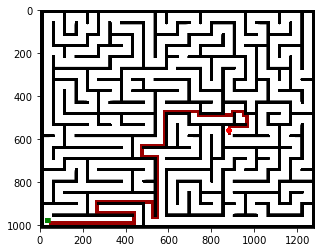

In [12]:
plt.imshow(maze_copy)
maze_o = plt.imread('maze.png')
plt.imshow(maze_o)
plt.show()

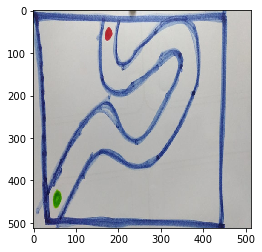

(512, 512, 3)


In [13]:
drawn = plt.imread('d2.png')
plt.imshow(drawn)
plt.show()
print drawn.shape




In [14]:
#remove all starting and end point pixels
import matplotlib

def hue_distance(h1,h2):
    h = 0
    if(h2 > 0.5):
        h = abs(1-h2)
    else:
        h = abs(h2-h1)
    if (h == 1):
        return 0.0
    else:
        return h
y,x, z =  drawn.shape
start = []
start_found = False
end = []
end_found = False
all_end = []
red = []
green = []
black = []
r1 = 340./360
r2 = 20.0/360.0
g1 = 82./360.
g2 = 120./360.
b1 = 200./360
b2 = 250./360

for i in range(y):
    for j in range(1, x):
        rgb = drawn[i, j]
        hsv = matplotlib.colors.rgb_to_hsv(rgb)
        hue = hsv[0]
        sat = hsv[1]
        val = hsv[2]
        if hsv[0] >= r1 or hsv[0] <= r2:
            if sat > 0.2:
                red.append((i,j))
        elif  hue >= g1 and hue <= g2 and sat > 0.2:
            green.append((i,j))
        elif hue >= b1 and hue <= b2 and sat > 0.2:
            black.append((i,j))
                
print len(red)
print len(green)
print len(black)


454
646
49202


In [15]:
drawn2 = drawn.copy()
for pixel in red:
    y,x = pixel
    drawn2[y][x] = [1,0,0]
for p in green:
    y,x = p
    drawn2[y][x] = [0,1,0]
for p in black:
    y,x = p
    drawn2[y][x] = [0,0,1]
    

    

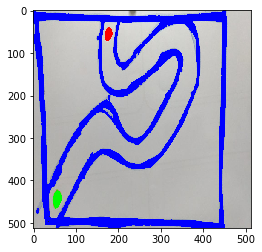

In [16]:
plt.imshow(drawn2)
plt.show()

In [17]:
def is_wall(point):
    x,y = point
    pixel = drawn2[x][y]
    isBlue = pixel[0] ==0 and pixel[1] == 0 and pixel[2] == 1
    if isBlue:
        return True
    else:
        return False

In [18]:
def updateQ(v,q,visited):
    x,y = v
    nbrs = []
    p1 = (x + 1 ,y)
    p2 = (x -1 , y)
    p3 = (x, y+1)
    p4 = (x, y-1)
    points = [p1,p2,p3,p4]
    for child in points:
        if not is_wall(child) and child not in visited:
            q.append(child)
            nbrs.append(child)
    return q,nbrs

In [19]:

def BFS(start,end):
    q = [start]
    visited = set()
    dic = {}
    while (len(q) > 0):
        v = q.pop(0)
        if (end == v):
            return dic
        if (v not in visited):
            visited.add(v)
            q,nbrs = updateQ(v,q,visited)
            for n in nbrs:
                dic[n] = v
    return "fail"
start = green[0]
end = red[0]
path = BFS(start,end)

In [20]:
xend = path[end]
while xend != start:
    size = 2
    x,y = xend
    for i in range(-size,size):
        for j in range(-size,size):
            drawn[x+i][y+j] = [100,0,0]
    xend = path[xend]

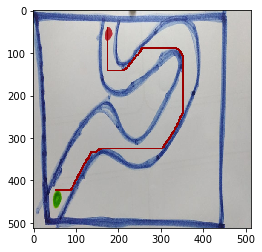

In [21]:
plt.imshow(drawn)
plt.show()

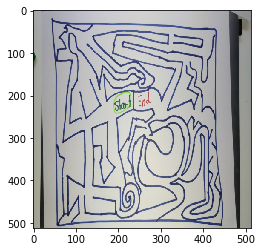

In [22]:
advancedMaze = plt.imread('advancedMaze.png')
plt.imshow(advancedMaze)
plt.show()


In [23]:
#remove all starting and end point pixels
import matplotlib

def hue_distance(h1,h2):
    h = 0
    if(h2 > 0.5):
        h = abs(1-h2)
    else:
        h = abs(h2-h1)
    if (h == 1):
        return 0.0
    else:
        return h
y,x, z =  advancedMaze.shape
print y,x,z
start = []
start_found = False
end = []
end_found = False
all_end = []
red = []
green = []
black = []
r1 = 340./360
r2 = 20.0/360.0
g1 = 82./360.
g2 = 120./360.
b1 = 200./360
b2 = 250./360

for i in range(y):
    for j in range(1, x):
        rgb = advancedMaze[i, j]
        hsv = matplotlib.colors.rgb_to_hsv(rgb[:-1])
        hue = hsv[0]
        sat = hsv[1]
        val = hsv[2]
        if hsv[0] >= r1 or hsv[0] <= r2:
            if sat > 0.2:
                red.append((i,j))
        elif  hue >= g1 and hue <= g2 and sat > 0.2:
            green.append((i,j))
        elif hue >= b1 and hue <= b2 and sat > 0.2:
            black.append((i,j))
                
print len(red)
print len(green)
print len(black)


512 512 4
278
439
36095


In [24]:
advancedMazeC = advancedMaze.copy()
for pixel in red:
    y,x = pixel
    advancedMazeC[y][x] = [1,0,0,1]
for p in green:
    y,x = p
    advancedMazeC[y][x] = [0,1,0,1]
for p in black:
    y,x = p
    advancedMazeC[y][x] = [0,0,1,1]
    

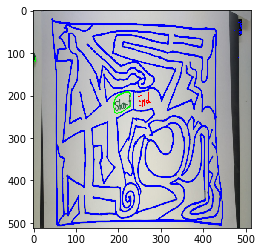

In [25]:

plt.imshow(advancedMazeC)
plt.show()

In [26]:
def is_wall(point):
    x,y = point
    if x >= 511 or y >= 511 or x <= 0 or y <= 0:
        return False
    
    pixel = advancedMazeC[x][y]
    isBlue = pixel[0] ==0 and pixel[1] == 0 and pixel[2] == 1
    if isBlue:
        return True
    else:
        return False

In [27]:
def updateQ(v,q,visited):
    x,y = v
    nbrs = []
    p1 = (x + 1 ,y)
    p2 = (x -1 , y)
    p3 = (x, y+1)
    p4 = (x, y-1)
    
    points = [p1,p2,p3,p4]
        
    for child in points:
        x,y = child
        if (not is_wall(child) and child not in visited):
            q.append(child)
            nbrs.append(child)
    return q,nbrs


def BFS(start,end):
    q = [start]
    visited = set()
    dic = {}
    while (len(q) > 0):
    
        v = q.pop(0)
        if (end == v):
            return dic
        if (v not in visited):
            visited.add(v)
            q,nbrs = updateQ(v,q,visited)
            for n in nbrs:
                dic[n] = v
    return "fail"
start = green[50]
end = red[50]

path = BFS(start,end)

In [28]:
end = red[50]
start = green[50]
xend = path[end]
while xend != start:
    size = 2
    x,y = xend
    for i in range(-size,size):
        for j in range(-size,size):
            advancedMaze[x+i][y+j] = [100,0,0,1]
    xend = path[xend]

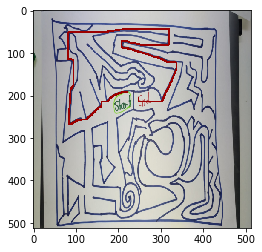

In [29]:
plt.imshow(advancedMaze)
plt.show()

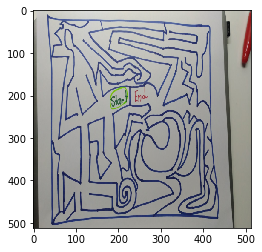

In [30]:
a2 = plt.imread('advancedMaze2.png')
plt.imshow(a2)
plt.show()


In [31]:
#remove all starting and end point pixels
import matplotlib

def hue_distance(h1,h2):
    h = 0
    if(h2 > 0.5):
        h = abs(1-h2)
    else:
        h = abs(h2-h1)
    if (h == 1):
        return 0.0
    else:
        return h
y,x, z =  a2.shape
print y,x,z
start = []
start_found = False
end = []
end_found = False
all_end = []
red = []
green = []
black = []
r1 = 340./360
r2 = 20.0/360.0
g1 = 82./360.
g2 = 120./360.
b1 = 200./360
b2 = 250./360

for i in range(y):
    for j in range(1, x):
        rgb = a2[i, j]
        hsv = matplotlib.colors.rgb_to_hsv(rgb[:-1])
        hue = hsv[0]
        sat = hsv[1]
        val = hsv[2]
        if hsv[0] >= r1 or hsv[0] <= r2:
            if sat > 0.2:
                red.append((i,j))
        elif  hue >= g1 and hue <= g2 and sat > 0.2:
            green.append((i,j))
        elif hue >= b1 and hue <= b2 and sat > 0.2:
            black.append((i,j))
                
print len(red)
print len(green)
print len(black)


512 512 4
1972
449
38593


In [32]:
a2C = a2.copy()
for pixel in red:
    y,x = pixel
    a2C[y][x] = [1,0,0,1]
for p in green:
    y,x = p
    a2C [y][x] = [0,1,0,1]
for p in black:
    y,x = p
    a2C[y][x] = [0,0,1,1]


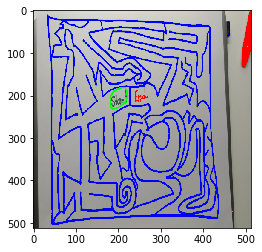

In [33]:
plt.imshow(a2C)
plt.show()

In [34]:
def is_wall(point):
    x,y = point
    pixel =a2C[x][y]
    isBlue = pixel[0] ==0 and pixel[1] == 0 and pixel[2] == 1
    if isBlue:
        return True
    else:
        return False


def updateQ(v,q,visited):
    x,y = v
    nbrs = []
    p1 = (x + 1 ,y)
    p2 = (x -1 , y)
    p3 = (x, y+1)
    p4 = (x, y-1)
    
    points = [p1,p2,p3,p4]
        
    for child in points:
        x,y = child
        if (not is_wall(child) and child not in visited):
            q.append(child)
            nbrs.append(child)
    return q,nbrs

greenS = set(green)
redS = set(red)
def BFS(start,end):
    q = [start]
    visited = set()
    dic = {}
    while (len(q) > 0):
        v = q.pop(0)
        if (v in redS):
            return dic
        if (v not in visited):
            visited.add(v)
            q,nbrs = updateQ(v,q,visited)
            for n in nbrs:
                dic[n] = v
    return "fail"
start = green[50]
end = red[50]
path = BFS(start,end)
    

In [35]:
print len(path)

65299


In [36]:
key = 0
for i in red:
    if i in path:
        key = i
print key
start = green[50]
        
xend = path[key]
while xend not in greenS:
    size = 2
    x,y = xend
    for i in range(-size,size):
        for j in range(-size,size):
            a2[x+i][y+j] = [100,0,0,1]
    
    xend = path[xend]
    


(206, 267)


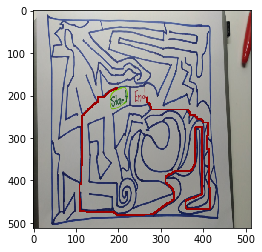

In [45]:
plt.imshow(a2)
plt.show()
